# Sample Image

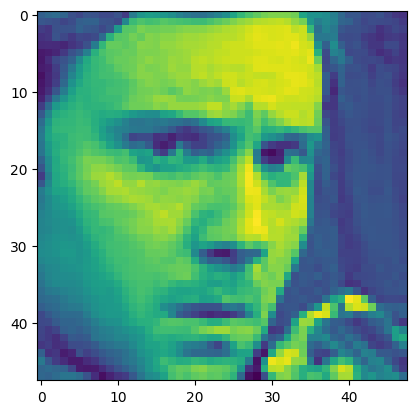

In [1]:
import numpy
import matplotlib.pyplot as plt
from PIL import Image
from scipy.signal import convolve2d
from PIL.ImageFilter import GaussianBlur



im = Image.open("sample/0.jpg").convert("L")
plt.figure()
plt.imshow(numpy.array(im))

# Edge detector

## Edge detection: Robert Cross Edge detector
1. The Roberts Cross operator performs a simple, quick to compute, 2-D spatial gradient measurement on an image. It thus highlights regions of high spatial frequency which often correspond to edges.

2. In theory, the operator consists of a pair of 2×2 convolution kernels as shown in Figure 1. One kernel is simply the other rotated by 90°. 

![alt text](sample/robert_cross.jpg)

3. We apply this convolution using scipy's convolve2d to each pixel

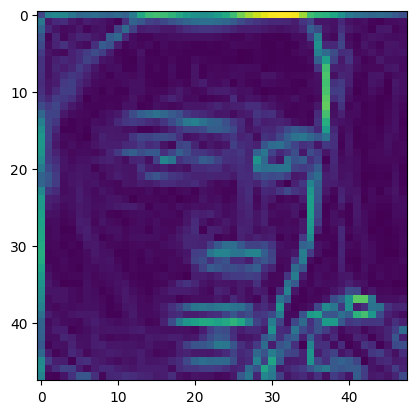

In [2]:
def _get_image_as_array(path: str):
    im = Image.open(path)
    im = im.convert(mode="L")
    
    arr = numpy.asarray(im)

    return arr

def _robert_edge_detector(path: str, blur: float, passfilter: int):
    #gx = numpy.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    #gy = numpy.array([[1,2,1],[0,0,0], [-1,-2,-1]])

    gx = numpy.array([[1,0],[0,-1]])
    gy = numpy.array([[0,1], [-1,0]])

    im = Image.open(path).convert("L")
    im = numpy.asarray(im)

    GX = convolve2d(im, gx, mode='same') 
    GY = convolve2d(im, gy, mode='same')

    if blur > 0:
        G = numpy.array([[0.1,0.1],[0.1,0.1]])
        im = convolve2d(im, blur*G, mode='same')

        GX = convolve2d(im, gx, mode='same') * 1/numpy.sum(G)
        GY = convolve2d(im, gy, mode='same') * 1/numpy.sum(G)

    
    ret = numpy.absolute(GX) + numpy.absolute(GY)

    if passfilter > 0:
        th = passfilter
        th = numpy.average(ret)
        indxL = numpy.where(ret < th)
        indxH = numpy.where(ret >= th)

        ret[indxL] = 0
        ret[indxH] += 50 

    return ret

im = _robert_edge_detector('sample/0.jpg', -1, -1)
plt.figure()
plt.imshow(im)
plt.savefig("sample/0_robert")



## Edge detection: Sobel Edge detector
1. The Sobel operator performs a 2-D spatial gradient measurement on an image and so emphasizes regions of high spatial frequency that correspond to edges.

2. In theory, the operator consists of a pair of 3×3 convolution kernels as shown in Figure .  One kernel is simply the other rotated by 90°. 

![alt text](sample/sobel.png)

3. We apply this convolution using scipy's convolve2d to each pixel

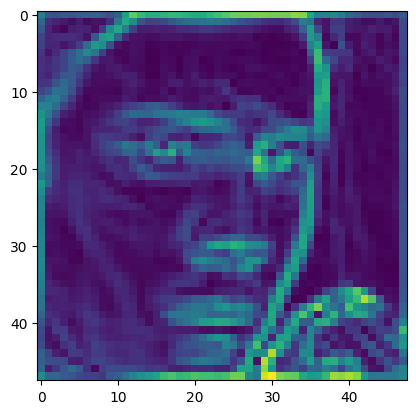

In [3]:
def _sobel_edge_detector(path: str, blur: float, passfilter: int):
    gx = numpy.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    gy = numpy.array([[1,2,1],[0,0,0], [-1,-2,-1]])

    #gx = numpy.array([[1,0],[0,-1]])
    #gy = numpy.array([[0,1], [-1,0]])

    im = Image.open(path).convert("L")
    im = numpy.asarray(im)

    GX = convolve2d(im, gx, mode='same') 
    GY = convolve2d(im, gy, mode='same')

    if blur > 0:
        G = numpy.array([[0.1,0.1],[0.1,0.1]])
        im = convolve2d(im, blur*G, mode='same')

        GX = convolve2d(im, gx, mode='same') * 1/numpy.sum(G)
        GY = convolve2d(im, gy, mode='same') * 1/numpy.sum(G)

    
    ret = numpy.absolute(GX) + numpy.absolute(GY)

    if passfilter > 0:
        th = passfilter
        th = numpy.average(ret)
        indxL = numpy.where(ret < th)
        indxH = numpy.where(ret >= th)

        ret[indxL] = 0
        ret[indxH] += 50 

    return ret

im = _sobel_edge_detector('sample/0.jpg', -1, -1)
plt.figure()
plt.imshow(im)
plt.savefig("sample/0_sobel")